<h1 style = "color : green"> External Diversion</h1>

<b> This Notebook is used to Visualize the User Browsing Behavior </b>

<b style = "color : red" > 1. Including all the import statements </b>

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<b style = "color : red" > 2. Read the Data from the CSV file with pandas </b>

In [2]:
data = pd.read_csv('12.csv')

#To Reverse The Dataframe rows 
data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]
data = data.sort_index(ascending=True, axis=0)
data = data.reindex(index=data.index[::-1])
data.head()

,id,lastVisitTime,title,typedCount,url,visitCount
47,10022,7/17/2016 8:53:20 AM,List of Ocean's Trilogy characters - Wikipedia...,0,https://en.wikipedia.org/wiki/List_of_Ocean%27...,1
46,10023,7/17/2016 8:55:21 AM,NaN,0,https://www.google.com/webhp?sourceid=chrome-i...,1
45,10024,7/17/2016 8:56:13 AM,NaN,0,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,1
44,10025,7/17/2016 8:56:15 AM,"How to insert, Update & remove data using JDat...",0,http://findnerd.com/list/view/How-to-insert-Up...,1
43,10026,7/17/2016 8:56:35 AM,NaN,0,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,1


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [3]:
#data = data.drop(["[]_id",'<ROOT>_id','typedCount'],axis=1)
#data = data.dropna()
#data.drop(48)
data

,id,lastVisitTime,title,typedCount,url,visitCount
47,10022,7/17/2016 8:53:20 AM,List of Ocean's Trilogy characters - Wikipedia...,0,https://en.wikipedia.org/wiki/List_of_Ocean%27...,1
46,10023,7/17/2016 8:55:21 AM,NaN,0,https://www.google.com/webhp?sourceid=chrome-i...,1
45,10024,7/17/2016 8:56:13 AM,NaN,0,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,1
44,10025,7/17/2016 8:56:15 AM,"How to insert, Update & remove data using JDat...",0,http://findnerd.com/list/view/How-to-insert-Up...,1
43,10026,7/17/2016 8:56:35 AM,NaN,0,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,1
42,10027,7/17/2016 8:56:38 AM,Joomla 3.1: extremely slow in bulk deletion - ...,0,http://stackoverflow.com/questions/18085863/jo...,1
41,10028,7/17/2016 8:56:49 AM,"Inserting, Updating and Removing data using JD...",0,"https://docs.joomla.org/Inserting,_Updating_an...",1
40,10012,7/17/2016 8:59:59 AM,nithyashree and vaishnav indian idol junior 19...,0,https://www.youtube.com/watch?v=1owRzStwjvQ,3
39,10029,7/17/2016 9:00:09 AM,kill dil title song - YouTube,0,https://www.youtube.com/results?search_query=k...,2
38,10030,7/17/2016 9:05:44 AM,Kill Dil - Full Title Song | Ranveer Singh | A...,0,https://www.youtube.com/watch?v=Rn6HPDltaWk,2


<b style = "color : red" >4. categorizing the URL</b>

In [4]:
TAG_RE = re.compile(r"<[^>]+>")
def remove_tags(text):
    return TAG_RE.sub('', text)

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res


def datum_categ(text):

    datum_box = DatumBox("2a13913dda346761765020c1f66e34f8")
    return datum_box.topic_classification(text)

def text_extract(url):
    try:
        
        try:
            page3 = urllib2.urlopen(url).read()
        
        except urllib2.HTTPError, err:
        
            if err.code == 404:
                print "Page not found!"
                return 'Error'
        
            elif err.code == 403:
                print "Access denied!"
                return 'Error'
    
            else:
                print "Something happened! Error code", err.code
                return 'Error'
        
        except urllib2.URLError, err:
            print "Some other error happened:", err.reason
            return 'Error'
        
        #page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


def categ(a):
    url = a
    return datum_categ(text_extract(url))
    


In [5]:
x = data

test_data = x.loc[:,('title','url','lastVisitTime','visitCount')] 


def categorize (name):
    if('www.google' in str(name)): 
        return 'Search' 
    elif ('mail' in str(name)):
        return 'Mail'
    else:
        return categ(name)

test_data['category'] = test_data['url'].map(categorize)

test_data

DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!


,title,url,lastVisitTime,visitCount,category
47,List of Ocean's Trilogy characters - Wikipedia...,https://en.wikipedia.org/wiki/List_of_Ocean%27...,7/17/2016 8:53:20 AM,1,News
46,NaN,https://www.google.com/webhp?sourceid=chrome-i...,7/17/2016 8:55:21 AM,1,Search
45,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:13 AM,1,Search
44,"How to insert, Update & remove data using JDat...",http://findnerd.com/list/view/How-to-insert-Up...,7/17/2016 8:56:15 AM,1,Computers & Technology
43,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:35 AM,1,Search
42,Joomla 3.1: extremely slow in bulk deletion - ...,http://stackoverflow.com/questions/18085863/jo...,7/17/2016 8:56:38 AM,1,Computers & Technology
41,"Inserting, Updating and Removing data using JD...","https://docs.joomla.org/Inserting,_Updating_an...",7/17/2016 8:56:49 AM,1,Computers & Technology
40,nithyashree and vaishnav indian idol junior 19...,https://www.youtube.com/watch?v=1owRzStwjvQ,7/17/2016 8:59:59 AM,3,News
39,kill dil title song - YouTube,https://www.youtube.com/results?search_query=k...,7/17/2016 9:00:09 AM,2,Arts
38,Kill Dil - Full Title Song | Ranveer Singh | A...,https://www.youtube.com/watch?v=Rn6HPDltaWk,7/17/2016 9:05:44 AM,2,Arts


<b style = "color : red" >5. Calculating the amount of time spent on each URL</b>

In [6]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    
    
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(i_time - j_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

In [7]:
test_data

,title,url,lastVisitTime,visitCount,category,timeSpent
47,List of Ocean's Trilogy characters - Wikipedia...,https://en.wikipedia.org/wiki/List_of_Ocean%27...,7/17/2016 8:53:20 AM,1,News,NA
46,NaN,https://www.google.com/webhp?sourceid=chrome-i...,7/17/2016 8:55:21 AM,1,Search,121
45,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:13 AM,1,Search,52
44,"How to insert, Update & remove data using JDat...",http://findnerd.com/list/view/How-to-insert-Up...,7/17/2016 8:56:15 AM,1,Computers & Technology,2
43,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:35 AM,1,Search,20
42,Joomla 3.1: extremely slow in bulk deletion - ...,http://stackoverflow.com/questions/18085863/jo...,7/17/2016 8:56:38 AM,1,Computers & Technology,3
41,"Inserting, Updating and Removing data using JD...","https://docs.joomla.org/Inserting,_Updating_an...",7/17/2016 8:56:49 AM,1,Computers & Technology,11
40,nithyashree and vaishnav indian idol junior 19...,https://www.youtube.com/watch?v=1owRzStwjvQ,7/17/2016 8:59:59 AM,3,News,190
39,kill dil title song - YouTube,https://www.youtube.com/results?search_query=k...,7/17/2016 9:00:09 AM,2,Arts,NA
38,Kill Dil - Full Title Song | Ranveer Singh | A...,https://www.youtube.com/watch?v=Rn6HPDltaWk,7/17/2016 9:05:44 AM,2,Arts,335


<br>
<br>
<b style = "color : red ;font-size: 20px " >6. Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

<b >6.1 Amount Of Time Spent On Each Category </b>

[('Arts', 1610), ('Business & Economy', 0), ('Computers & Technology', 197), ('Error', 0), ('Health', 0), ('Home & Domestic Life', 0), ('Mail', 0), ('News', 234), ('Recreation & Activities', 0), ('Reference & Education', 0), ('Science', 0), ('Search', 872), ('Shopping', 0), ('Society', 0), ('Sports', 216)]
Amount Of Time Spent On Each Category


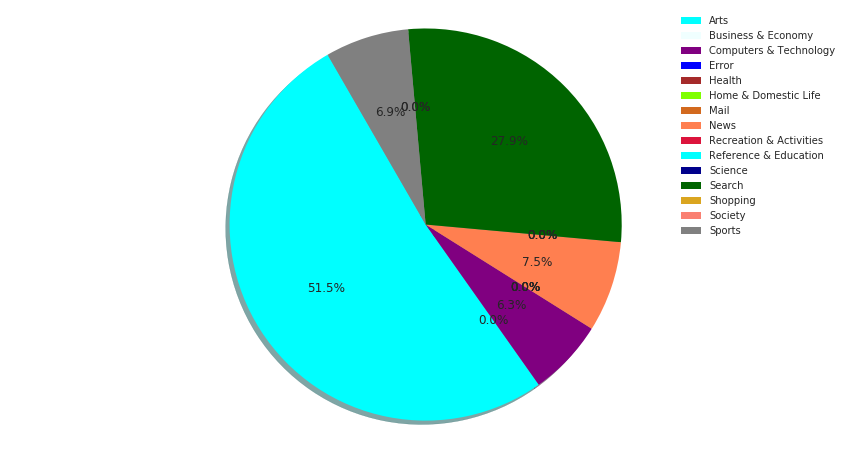

In [8]:
# Listing the lables
labels = "Arts","Business & Economy","Computers & Technology","Health","Home & Domestic Life","Mail","News","Search","Shopping","Society","Sports","Recreation & Activities","Reference & Education","Science","Error"


# Augumenting the time spent on each label
i_max = test_data.shape[0]


category_dict = {"Arts":0 ,"Business & Economy":0,
                 "Computers & Technology":0,"Error":0,
                 "Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,
                 "Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,
                 "Search":0,"Mail":0}



for i in range(0,i_max):
    if (str(test_data.iloc[i]['timeSpent']) is "NA" ):
        category_dict[test_data.iloc[i]['category']] += 0
    else:
        category_dict[test_data.iloc[i]['category']] += int(test_data.iloc[i]['timeSpent'])


ordered_category_dict = sorted(category_dict.items())

sizes = []

for i in ordered_category_dict:
    sizes.append(i[1])



print ordered_category_dict
#print sizes

# Now drawing the Pie Diagrm

fig1, ax1 = plt.subplots(figsize=(15,8))
#colors = sns.color_palette("hls",14)

colors = ['aqua','azure','purple','blue','brown','chartreuse','chocolate','coral','crimson','cyan','darkblue',
          'darkgreen','goldenrod','salmon','grey']

ax1.pie(sizes, explode=None ,colors = colors, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=120)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(("Arts","Business & Economy","Computers & Technology","Error","Health","Home & Domestic Life","Mail","News",'Recreation & Activities',
            'Reference & Education','Science','Search','Shopping','Society','Sports'),
           scatterpoints=1,loc='upper right',fontsize=10)

print 'Amount Of Time Spent On Each Category'
plt.show()



<br>
<br>
<b >6.2 Time Spent on each category in Chronological order</b>
<br>
<br>

In [9]:
# mapping the catagories with specific colors

color_dict = { "Arts":"aqua","Business & Economy":"azure","Computers & Technology":"purple","Error":"blue",
              "Health":"brown", "Home & Domestic Life" : "chartreuse","Mail":"chocolate","News":"coral",
              "Recreation & Activities":"crimson", 'Reference & Education':"cyan",'Science':"darkblue",
              "Search":"darkgreen",'Shopping':"goldenrod",'Society':"salmon",'Sports':"grey" }


color_list = []
def map_color(color):
        return color_dict[color]

for i in range(0,test_data.shape[0]):
    color_list.append(map_color(test_data.iloc[i]['category']))

td = pd.Series(color_list)
test_data['color'] = td.values

test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,color
47,List of Ocean's Trilogy characters - Wikipedia...,https://en.wikipedia.org/wiki/List_of_Ocean%27...,7/17/2016 8:53:20 AM,1,News,NA,coral
46,NaN,https://www.google.com/webhp?sourceid=chrome-i...,7/17/2016 8:55:21 AM,1,Search,121,darkgreen
45,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:13 AM,1,Search,52,darkgreen
44,"How to insert, Update & remove data using JDat...",http://findnerd.com/list/view/How-to-insert-Up...,7/17/2016 8:56:15 AM,1,Computers & Technology,2,purple
43,NaN,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,7/17/2016 8:56:35 AM,1,Search,20,darkgreen
42,Joomla 3.1: extremely slow in bulk deletion - ...,http://stackoverflow.com/questions/18085863/jo...,7/17/2016 8:56:38 AM,1,Computers & Technology,3,purple
41,"Inserting, Updating and Removing data using JD...","https://docs.joomla.org/Inserting,_Updating_an...",7/17/2016 8:56:49 AM,1,Computers & Technology,11,purple
40,nithyashree and vaishnav indian idol junior 19...,https://www.youtube.com/watch?v=1owRzStwjvQ,7/17/2016 8:59:59 AM,3,News,190,coral
39,kill dil title song - YouTube,https://www.youtube.com/results?search_query=k...,7/17/2016 9:00:09 AM,2,Arts,NA,aqua
38,Kill Dil - Full Title Song | Ranveer Singh | A...,https://www.youtube.com/watch?v=Rn6HPDltaWk,7/17/2016 9:05:44 AM,2,Arts,335,aqua


<h2> Saving as an Offline copy</h2>

In [10]:
import pickle 
with open('/home/sreeram_0xb5e/Desktop/WDD (Python2)', 'wb') as f:
    pickle.dump(test_data, f, -1)

In [11]:
with open('/home/sreeram_0xb5e/Desktop/ED(3.csv)', 'rb') as f:
    test_data= pickle.load(f)

test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,color
47,NaN,http://home.mcafee.com/Root/RenewProduct.aspx?...,5/26/2016 7:07:05 AM,1,Computers & Technology,NA,purple
46,Antivirus Software and Internet Security For Y...,http://home.mcafee.com/root/campaign.aspx?cid=...,5/26/2016 7:07:06 AM,1,Computers & Technology,1,purple
45,McAfee LiveSafe,http://promos.mcafee.com/offer.aspx?id=861889&...,5/26/2016 7:07:11 AM,1,Computers & Technology,5,purple
44,Antivirus Software and Internet Security For Y...,http://home.mcafee.com/root/campaign.aspx?cid=...,5/26/2016 7:07:23 AM,4,Computers & Technology,12,purple
43,McAfee LiveSafe,http://promos.mcafee.com/offer.aspx?id=1007132...,5/26/2016 7:07:26 AM,4,Computers & Technology,3,purple
42,NaN,https://www.google.co.in/webhp?sourceid=chrome...,5/26/2016 3:37:25 PM,1,Search,NA,darkgreen
41,Sai Sansthan,https://online.sai.org.in/homePage.do?paramete...,5/26/2016 3:40:32 PM,1,Society,187,salmon
40,NaN,https://www.google.co.in/webhp?sourceid=chrome...,6/7/2016 3:47:14 PM,1,Search,NA,darkgreen
39,NaN,https://www.google.co.in/url?sa=f&rct=j&url=ht...,6/7/2016 3:47:21 PM,1,Search,7,darkgreen
38,Google,https://www.google.co.in/webhp?sourceid=chrome...,6/7/2016 3:49:07 PM,2,Search,106,darkgreen


</br>
</br>
Choosing the Sample Data from Detailed Analysis
</br>
</br>

In [12]:
print test_data.shape[0]

sample_test_data = test_data
print sample_test_data.shape[0]

48
48


</br>
</br>
Time Spent Graph
</br>
</br>

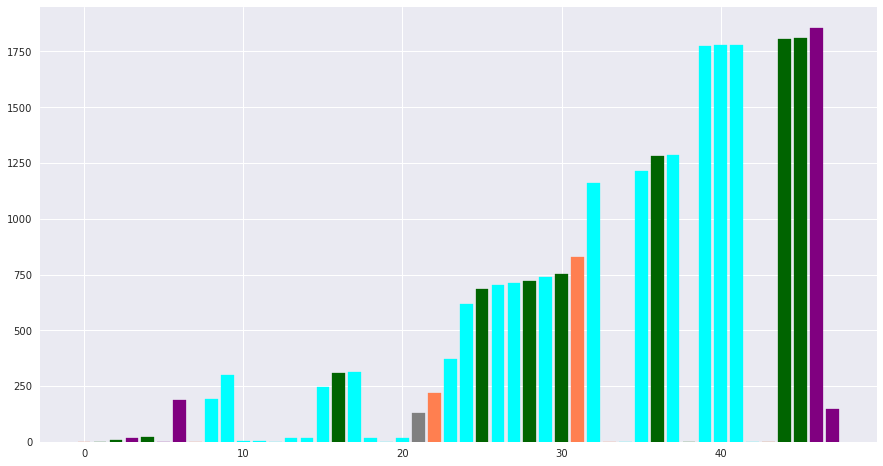

[0, 3, 9, 10, 69, 71, 107, 81, 65, 57, 51, 75, 83, 84, 76, 70, 82, 91, 106, 131, 137, 139, 140, 141, 143, 144, 152, 185, 190, 197, 197, 246, 247, 247, 249, 250, 254, 245]


In [13]:
time_spent_list = []

temp = 0
temp_category = ''


switch_time = []
count = 1
switch_temp = 0

for i in range(0,sample_test_data.shape[0]):
    
    if (sample_test_data.iloc[i]['timeSpent'] == 'NA'):
        time_spent_list.append(0)
    
    else:
        
        switch_temp += sample_test_data.iloc[i]['timeSpent']
        if ((temp_category == sample_test_data.iloc[i]['category']) or (sample_test_data.iloc[i]['category'] == 'Search') 
             or (temp_category == 'Computers & Technology' and sample_test_data.iloc[i]['category'] == 'Science') or
             (temp_category == 'Science' and sample_test_data.iloc[i]['category'] == 'Computers & Technology')):
        
            acc_temp = temp + sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(acc_temp)
            temp = acc_temp
            
        else:
            count += 1
            temp = sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(temp)
            temp_category = sample_test_data.iloc[i]['category']
        
        switch_time.append(switch_temp/count)

        

figure = plt.figure(figsize=(15,8))
pts = np.arange(sample_test_data.shape[0])
p = plt.bar(pts, height= time_spent_list)



for i in range(0,sample_test_data.shape[0]):
    p.patches[i].set_color(color_list[i])
    

plt.show()

print switch_time

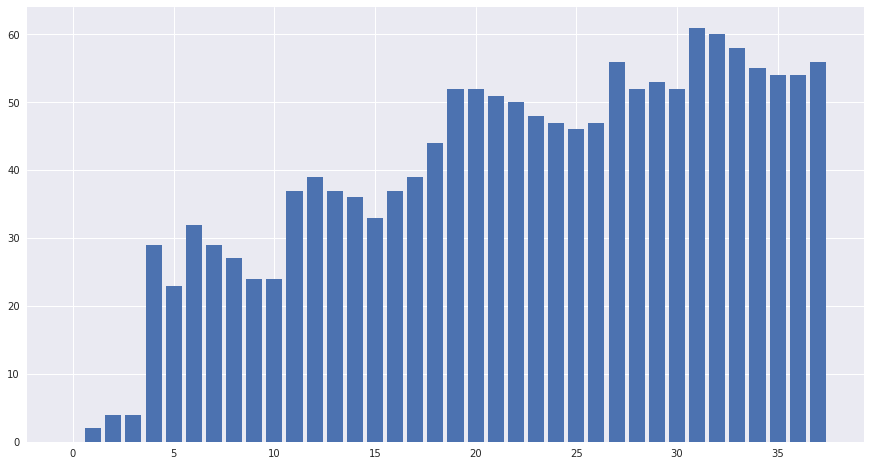

In [15]:
temp = 0
count = 0

count_arr= []
sr_arr = []

for i in range(0,sample_test_data.shape[0]):
    count += 1
    if (sample_test_data.iloc[i]['timeSpent'] != 'NA'):
        temp = temp + sample_test_data.iloc[i]['timeSpent']
        sr_arr.append(temp/count) 
        

figure = plt.figure(figsize=(15,8))
pts = np.arange(len(sr_arr))
p = plt.bar(pts, height= sr_arr)

plt.show()